# Assignment #5 , Wali Ullah (ERP:09745)


In [ ]:
#!pip install category_encoders

import numpy as np
import pandas as pd
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy.stats import shapiro

import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

In [2]:
def load_file(filepath, ext):
    ext=ext
    if ext=='csv':
        data =  []
        col = []
        checkcol = False
        with open(filepath) as f:
            for val in f.readlines():
                val = val.replace("\n","")
                val = val.split(',')
                if checkcol is False:
                    col = val
                    checkcol = True
                else:
                    data.append(val)
        df = pd.DataFrame(data=data, columns=col)
    elif ext=='xlsx':
        df = pd.read_excel(filepath)
    else:
        df='No such file can be extracted'
    return df

In [3]:
df1=load_file('C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-5\\House.Price.csv','csv')
#print(df1)

In [20]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


# Function-2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)

In [4]:
def data_display(data, n):
    # Create a DataFrame object
    df = pd.DataFrame(data)
    #print("Contents of the Dataframe : ")
    #print(df)
    
    print('**** Shape of the Data ****')
    #df.shape
    print(df.shape)
    print('**** Columns Name ****')
    print(df.columns)
    print('**** Data Type of Columns ****')
    print(df.dtypes)
    
    print('**** Select first n Rows from a Dataframe using head() function ****')
    # Select the top n rows of the Dataframe
    dfObj1 = df1.head(n)
    print("First", n, "rows of the Dataframe : ")
    print(dfObj1)
    print('**** Select last n Rows from a Dataframe using tail() function ****')
    # Select the bottom n rows of the Dataframe
    dfObj2 = df1.tail(n)
    print("Last",n, "rows of the Dataframe : ")
    print(dfObj2)
    

In [5]:
data_display(df1, 8)

**** Shape of the Data ****
(1460, 81)
**** Columns Name ****
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars'

# F3:remove unnecessary/useless columns (based on results of F2 and your background knowledge and the problem to be solved), e.g., identifiers, multiple primary keys, extra KPI like GMROI in sales which is the same for the whole year etc.

In [8]:
# Delete unnecessary/useless columns 
# Take two inputs 1) data and 2) a list with columns names to be removed as 

# to_drop = ['Edition Statement', 'Corporate Author','Corporate Contributors','Former owner','Engraver']

def dt1(data, to_drop):
    df = pd.DataFrame(data)
    df.drop(to_drop, inplace=True, axis=1)

    

In [10]:
# delete columns with a single unique value

def dt2(data):
    #df1=data
    # get number of unique values for each column
    df = pd.DataFrame(data)
    counts = df.nunique()
    #print(counts)
    # record columns to delete
    to_del1 = [i for i,v in enumerate(counts) if v == 1]
    print(to_del1)
    # drop useless columns
    df.drop(to_del1, axis=1, inplace=True)
    
    #df = pd.DataFrame(df1)
    print('First Operation')
    print(df.shape)
    # delete columns where number of unique values is less than 1% of the rows
    # get number of unique values for each column
    counts = df.nunique()
    # record columns to delete
    to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
    
    print(to_del)
    # drop useless columns
    df.drop(to_del, axis=1, inplace=True)
    print('2nd Operation')
    print(df.shape)
    
    # delete rows of duplicate data from the dataset
    df.drop_duplicates(inplace=True)
    print('3rd Operation')
    print(df.shape)
    
    return df

# F4: remove rows containing a particular value of a given column, e.g., in smoking_status column, I don't want to consider non-smokers in my ML problem so I remove all these rows.

In [11]:
#Delete Rows which has value of a1 to be given as string
#Delete rows with has the value a1
#Delete Rows with outlier values specify column and value as a2
def delrows(data, a1,col, a2):
    df=data
    df.columns[(df == 'a1').any()]
    df.drop(columns=df.columns[(df == 'a1').any()])
    #delete the the outliers
    df.drop(df[df[col] <= a2].index, inplace = True)
    print (df.shape)
    return df

In [13]:
df1['SalePrice'] = df1['SalePrice'].astype(float) 
df1['Street']=df1['Street'].astype(str)

In [14]:
dff1=delrows(df1,'MnPrv', 'SalePrice', 142125)
dff1

C:\Users\waliullah\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(936, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,10,2009,WD,Normal,185000.0
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0


# F5: determine the missing values in the whole dataset

In [15]:
def misval(data):
    df=data
    print (df.isnull())
    print(df.isnull.sum())
    mano.matrix(df)

In [16]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,10,2009,WD,Normal,185000.0
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0


In [17]:
misval(df1)

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False  False   
1     False       False     False        False    False   False  False   
2     False       False     False        False    False   False  False   
4     False       False     False        False    False   False  False   
5     False       False     False        False    False   False  False   
...     ...         ...       ...          ...      ...     ...    ...   
1454  False       False     False        False    False   False  False   
1455  False       False     False        False    False   False  False   
1456  False       False     False        False    False   False  False   
1457  False       False     False        False    False   False  False   
1459  False       False     False        False    False   False  False   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

AttributeError: 'function' object has no attribute 'sum'

# F6: analyze missing values of one or more columns using mano module

In [ ]:
def misvalmano(data):
    mano.matrix(data)

    
misvalmano(dfs1)

# F7: cater for missing values (input the column with missing value, and the method through which you want to cater for the missing values)

In [ ]:
mdf = pd.read_csv("C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-5\\bb1.csv")
mdf

In [ ]:
def misvalfill(data):
    col=input("Enter Column Name:")
    print("Choose among Mean, LinInter")
    option=input("Enter Option Name:")
    if option=='Mean':
        data[col]=data[col].fillna(data[col].mean())
    #elif option=='Mode':
     #   data[col]=data[col].fillna(data[col].value_counts())
    elif option=='LinInter':
        data[col]=data[col].fillna(data[col].interpolate(method ='linear', limit_direction ='backward'))
    return data

In [ ]:
mdf1=misvalfill(mdf)

In [ ]:
mdf1

# F8: Function for numerical data analysis - includes histogram, boxplot, qqplot, describe, and statistical tests for normality

In [ ]:
def visual(data):
    col=input("Enter Column Name:")
    data[col].hist()
    print("Histogram of", col, "Data")
    py.show()
    sns.boxplot(data[col])
    print("Boxplot of", col, "Data")
    py.show()
    sm.qqplot(data[col], line ='45') 
    print("QQPlot of", col, "Data")
    py.show() 
    
    print("Discriptive Stat of", col, "Data")
    print(data[col].describe())
    #print(ddf1)
    print("Normality Test of", col, "Data")
    # normality test
    stat, p = shapiro(data[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [ ]:
visual(mdf1)

# F9: Function for categorical data analysis - includes value counts, and bar charts

In [ ]:
# def visual2(data):
    col=input("Enter Column Name:")
    count_no_sub = len(data[data[col]==0])
    count_sub = len(data[data[col]==1])
    pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
    print('Number of Zero Catagory',count_no_sub)
    print("percentage of no subscription is", pct_of_no_sub*100)
    pct_of_sub = count_sub/(count_no_sub+count_sub)
    print('Number of One Catagory',count_sub)
    print("percentage of subscription", pct_of_sub*100)
    
    data[col].hist()
    print("Histogram of", col, "Data")
    py.show()
    print("Discriptive Stat of", col, "Data")
    print(data[col].describe())
    print("Barplot of", col, "Data")
    sns.countplot(x=data[col], data=data, palette='hls')
    plt.show()

In [ ]:
visual2(mdf1)

# F-10:Function to change the type of any column (input col name and the type you want)

In [ ]:
def change_type(data):
    col=input("Enter Column Name:")
    print("Choose among Int, Float, String")
    option=input("Enter Option Name:")
    if option=='Int':
        data[col]=data[col].astype(int).dtypes
    elif option=='Flot':
        data[col]=data[col].astype(float).dtypes
    elif option=='String':
        data[col]=data[col].astype(str).dtypes
    return data

In [ ]:
mdf2=change_type(mdf1)

In [ ]:
mdf2.dtypes


In [ ]:
mdf2

# F11: Function to change the discretization of a particular categorical column, e.g., rename the values, remove space between value names etc.

In [55]:
def rsvalname(data,body):
    df=data
    df["body"] = df["body"].astype(str)
    df["body"].replace(" ", "")
    print(df["body"])

    df["body"] = df["body"].astype('category')
    df["NewVar"] = df["body"].cat.codes
    return df


In [58]:
dfq = pd.read_csv("C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-5\\d11.csv")
dfq

,symboling,body,drive_wheels,num_cylinders,price
0,3,conve rtible,rwd,four,13495.0
1,3,convertible,rwd,four,16500.0
2,1,hatch back,rwd,six,16500.0
3,2,sedan P,fwd,four,13950.0
4,2,sedan,4wd,five,17450.0
...,...,...,...,...,...
200,-1,sedan,rwd,four,16845.0
201,-1,sedan,rwd,four,19045.0
202,-1,sedan,rwd,six,21485.0
203,-1,sedan,rwd,six,22470.0


In [59]:
df1=rsvalname(dfq,'body')
df1

0      conve  rtible
1        convertible
2        hatch  back
3            sedan P
4              sedan
           ...      
200            sedan
201            sedan
202            sedan
203            sedan
204            sedan
Name: body, Length: 205, dtype: object


,symboling,body,drive_wheels,num_cylinders,price,NewVar
0,3,conve rtible,rwd,four,13495.0,0
1,3,convertible,rwd,four,16500.0,1
2,1,hatch back,rwd,six,16500.0,3
3,2,sedan P,fwd,four,13950.0,8
4,2,sedan,4wd,five,17450.0,7
...,...,...,...,...,...,...
200,-1,sedan,rwd,four,16845.0,7
201,-1,sedan,rwd,four,19045.0,7
202,-1,sedan,rwd,six,21485.0,7
203,-1,sedan,rwd,six,22470.0,7


In [60]:
df2=rsvalname(dfq,'drive_wheels')
df2

0      conve  rtible
1        convertible
2        hatch  back
3            sedan P
4              sedan
           ...      
200            sedan
201            sedan
202            sedan
203            sedan
204            sedan
Name: body, Length: 205, dtype: object


,symboling,body,drive_wheels,num_cylinders,price,NewVar
0,3,conve rtible,rwd,four,13495.0,0
1,3,convertible,rwd,four,16500.0,1
2,1,hatch back,rwd,six,16500.0,3
3,2,sedan P,fwd,four,13950.0,8
4,2,sedan,4wd,five,17450.0,7
...,...,...,...,...,...,...
200,-1,sedan,rwd,four,16845.0,7
201,-1,sedan,rwd,four,19045.0,7
202,-1,sedan,rwd,six,21485.0,7
203,-1,sedan,rwd,six,22470.0,7


# F12: Function for data analysis - extract year, month etc., subtract dates etc. (this function cannot be specified exactly so just add what you believe are the basic things

In [ ]:
#Time-related operations
#For datetime type Sequence or Scalar objects, the following time-related built-in functions are provided.

df = lens[[lens.unix_timestamp.astype('datetime').rename('dt')]]
df[df.dt,
df.dt.year.rename('year'),
df.dt.month.rename('month'),
df.dt.day.rename('day'),
df.dt.hour.rename('hour')].head(5)
from odps.df import day
df.a - day(3)
(df.b - df.a).dtype
df.b - df.a).rename('a')

In [ ]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

# F13: function to make a deep copy of a dataframe

In [ ]:
def deep_copy (data):
    data_deepcopy = data.copy()
    return data_deepcopy

dffff2=deep_copy(df_flights)
dffff2

# F14: function to encode categorical into numerical (label, ordinal, or onehot)

In [ ]:
def disc_cata(data):
    col=input("Enter Column Name:")
    print("Choose among ReplaceValues, One-Hot, Binary")
    option=input("Enter Option Name:")
    if option=='ReplaceValues':
        labels = data[col].astype('category').cat.categories.tolist()
        replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        print(replace_map_comp)
        data.replace(replace_map_comp, inplace=True)
    elif option=='One-Hot':
        data= pd.get_dummies(data, columns=[col], prefix = ['col'])

    elif option=='Binary':
        df_flights_ce = data.copy()
        encoder = ce.BinaryEncoder(cols=[col])
        data = encoder.fit_transform(df_flights_ce)
    return data

In [ ]:
d1=disc_cata(df_flights)

In [ ]:
d1

In [ ]:
distance
carrier_1

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# F15: function to split dataframe into X (predictors) and y (label), apply standard scaling on X, apply the desired ML algorithm and output the results:
Â - input dataframe
Â - input the algo name (e.g., decisiontree)
Â - input whether this is a classification task or a regression task (then you should select either decisiontreeclassifier or decisiontreeregressor within the function)
Â - for classification, output confusion matrix, AUC, logloss and classification report
Â - for regression, output MAE, MSE, R-squared and adjusted R-squaredÂ 
Â - NB: you can add more metrics if available


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [11]:
           
def LReg(x_train, x_test, y_train, y_test):
    print('================================================================================')
    print('Linear Regression Model Results')
    print('_______________________________________________________________________________')
    #LinearRegression model
    LR = LinearRegression(normalize=True)

    #fit
    LR.fit(x_train, y_train)

    #predict
    y_predict = LR.predict(x_test)

    #score variables
    LR_MAE = round(MAE(y_test, y_predict),2)
    LR_MSE = round(MSE(y_test, y_predict),2)
    LR_R_2 = round(R2(y_test, y_predict),4)
    LR_CS  = round(CVS(LR, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LR_MAE}\n")
    print(f" Mean Squared Error: {LR_MSE}\n")
    print(f" R^2 Score: {LR_R_2}\n")
    cross_val(LR,LinearRegression(),x,y,5)
    Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Linear_Regression
    print('================================================================================')


def LASOO(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Lasso Regression Model Results')
    print('_______________________________________________________________________________')
    LS = Lasso(alpha = 0.9)
    #fit
    LS.fit(x_train,y_train)

    #predict
    y_predict = LS.predict(x_test)

    #score variables
    LS_MAE = round(MAE(y_test, y_predict),2)
    LS_MSE = round(MSE(y_test, y_predict),2)
    LS_R_2 = round(R2(y_test, y_predict),4)
    LS_CS  = round(CVS(LS, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LS_MAE}\n")
    print(f" Mean Squared Error: {LS_MSE}\n")
    print(f" R^2 Score: {LS_R_2}\n")
    cross_val(LS,Lasso(alpha = 0.05),x,y,5)
    Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Lasso_Regressor 
    print('================================================================================')

    
    
#Decision Tree for Regression    
    


def DTReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Regression Problem')
    print('_______________________________________________________________________________')
    
    #from sklearn.tree import DecisionTreeRegressor
    #from sklearn import metrics
    regressor = DecisionTreeRegressor()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)

    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    dt_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    dt_Regressor 
    print('================================================================================')


#KNN for Regression    
def KNNReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Regression Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(x_train, y_train)
    y_pred = knn_reg.predict(x_test)
    
    
    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    #df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    knn_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    knn_Regressor 
    print('================================================================================')

    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    
    
    
    
    
    
    
    
    
    
#Classification Functions

#Decision Tree for Classification
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, confusion_matrix
def DTClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Classification Problem')
    print('_______________________________________________________________________________')
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
#from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    



#Building Naive Bayes for Classification
def NBClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Naive Bayes Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
    
    # Fitting Naive Bayes to the Training set  
#from sklearn.naive_bayes import GaussianNB  
    classifier = GaussianNB()  
    classifier.fit(x_train, y_train)  
# Predicting the Test set results  
    y_pred = classifier.predict(x_test) 
# Making the Confusion Matrix  
#from sklearn.metrics import confusion_matrix  
    cm = confusion_matrix(y_test, y_pred)  
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    print(y_test, y_pred)
    print('================================================================================')

#KNN for Classification    
def KNNClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test)
    #from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    

In [45]:
datac = pd.read_csv("C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-5\\price1.csv")
datar = pd.read_csv("C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-5\\price.csv")


In [37]:
datac


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FullBath,BedroomAbvGr,SalePrice
0,60,8450,7,5,2003,2003,706,150,856,2,3,1
1,20,9600,6,8,1976,1976,978,284,1262,2,3,0
2,60,11250,7,5,2001,2002,486,434,920,2,3,1
3,70,9550,7,5,1915,1970,216,540,756,1,3,0
4,60,14260,8,5,2000,2000,655,490,1145,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,953,953,2,3,0
1456,20,13175,6,6,1978,1988,790,589,1542,2,3,1
1457,70,9042,7,9,1941,2006,275,877,1152,2,4,1
1458,20,9717,5,6,1950,1996,49,0,1078,1,2,0


In [42]:
datar

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FullBath,BedroomAbvGr,price,dd
0,60,8450,7,5,2003,2003,706,150,856,2,3,208500,Y
1,20,9600,6,8,1976,1976,978,284,1262,2,3,181500,N
2,60,11250,7,5,2001,2002,486,434,920,2,3,223500,Y
3,70,9550,7,5,1915,1970,216,540,756,1,3,140000,N
4,60,14260,8,5,2000,2000,655,490,1145,2,4,250000,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,953,953,2,3,175000,N
1456,20,13175,6,6,1978,1988,790,589,1542,2,3,210000,Y
1457,70,9042,7,9,1941,2006,275,877,1152,2,4,266500,Y
1458,20,9717,5,6,1950,1996,49,0,1078,1,2,142125,N


In [30]:
def ML_alg(data):
    
    print("Choose among KNN, DecisionTree, etc")
    alg=input("Enter Algorithm Name:")
    print("Choose C for Classification and R for Regression Problem")
    option=input("Is it Classification Probelem or Regression Task:")
    #print("Choose The Label")
    #dep_var=input("The Label Variable:")
    print('Choose Scaling Method i.e. MinMaxScaler, StandardScaler ')
    transform=input("Enter the Scaling Method:")
    #Label and Predictors
    data_final_vars=data.columns.values.tolist()
    #y=data.['dep_var']
    #X=[i for i in data_final_vars if i not in y]
    
    X = data.iloc[:, :-1].values
    y = data.iloc[:, 6].values
    
    if transform=='MinMaxScaler':
        scaler = MinMaxScaler()
        # transform data
        X = scaler.fit_transform(X)
    if transform=='StandardScaler':
        scaler = StandardScaler()
        # transform data
        X = scaler.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)   
        
    
    if option=='C':
        if alg=='KNN':
            #KNN Classification Algrotham
            KNNClassification(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for classification
            DTClassification(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            #NaiveBayes function for NaiveBayes
            NBClassification(x_train, x_test, y_train, y_test)
        elif alg=='LogisticReg':
            #Logistic Regression for Classification
            print('not ready now')
    elif option=='R':
        if alg=='KNN':
            #KNN Regrssion Algrotham
            KNNReg(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for Regression
            DTReg(x_train, x_test, y_train, y_test)
        elif alg=='OLS':
            #OLS function for Regression
            LReg(x_train, x_test, y_train, y_test)
        elif alg=='Lasso':
            #Lasso function for Regression
            LASOO(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            print('Naive Bayse is only for Classification Problems')
        elif alg=='LogisticReg':
            print('Logistic Function is only for Classification Problems')
            
 
    

Choose among KNN, DecisionTree, etc
Enter Algorithm Name:KNN
Choose C for Classification and R for Regression Problem
Is it Classification Probelem or Regression Task:C
Choose Scaling Method i.e. MinMaxScaler, StandardScaler 
Enter the Scaling Method:StandardScaler
KNN Model Results for Classification Problem
_______________________________________________________________________________
[[107   0   5 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       112
           2       0.00      0.00      0.00         1
          16       0.12      0.50      0.20         2
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         4
          27       0.00      0.00      0.00         0
          28       0.00      0.00     

C:\Users\waliullah\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\waliullah\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\waliullah\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\waliullah\Anaconda3\lib\site-packages\skle

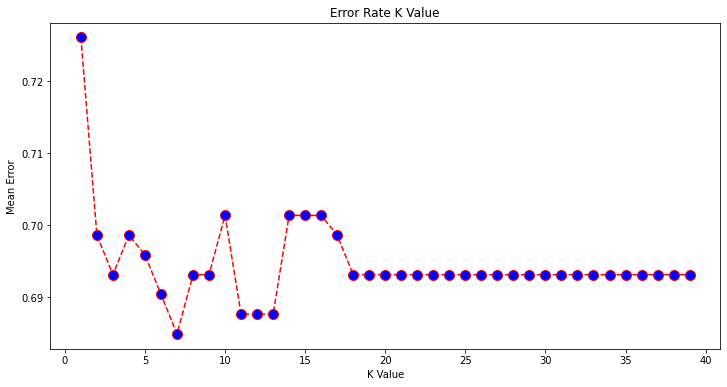

In [31]:
ML_alg(datac)

# F16: Function to apply ANOVA and output results

In [43]:
def ANOVA(data):
    df =data
    col1=input("Choose the Variable:")
    print("Choose The Classifier/String")
    col2=input("The String Variable:")
    
    model = ols('col1 ~ C(Q(col2))', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print ("\nAnova => Sales - Order Priority")
    display(anova_table)

In [ ]:
d2=ANOVA(datar)

# F17: Function to generate correlation heatmaps



In [ ]:
def correlation1(data):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
def correlation2(data):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(data.corr(), camp = "YlGnBu", linecolor = 'white', linewidths = 1, annot = True)
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# F18: Function to generate scatter plot

In [4]:
def scatter(data):
    df =data
    col1=input("Choose the first Variable:")
    col2=input("Choose the first Variable:")
    gym.plot.scatter(x = 'weight', y = 'height')